# Model fitting

In [15]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [16]:
test_SEDs

['/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501.ecsv']

## loading data



In [17]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])


/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv



***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



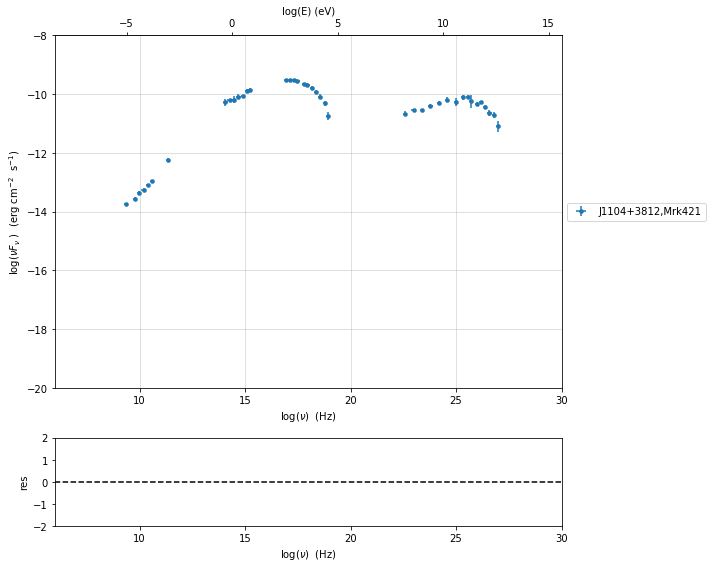

In [18]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.426527e+00, err=1.242337e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549105e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.113008e+00, err=5.915490e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.500000,14.500000]
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.783218e+00, err=9.834847e-02 

---> initial range for i

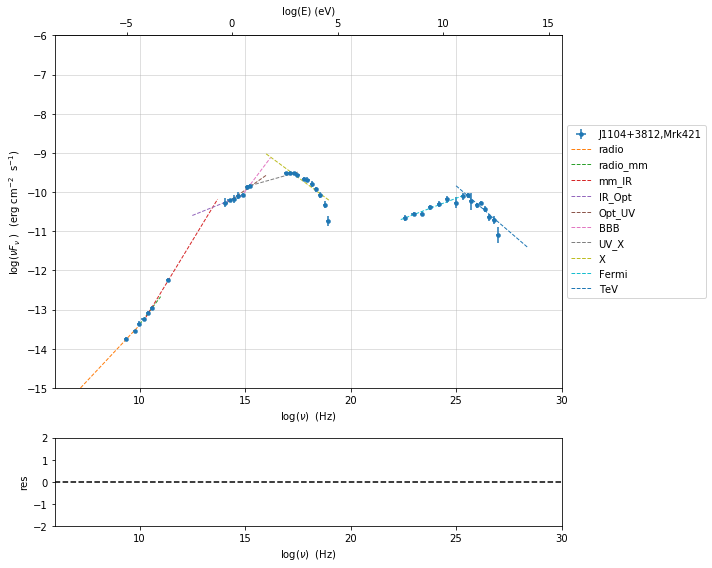

In [35]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [36]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

name   par type       units          val      phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- ------------- ---------------- ---------------- ----- ------
   b    curvature               -1.545301e-01    -1.000000e+01     0.000000e+00 False  False
   c third-degree               -1.023245e-02    -1.000000e+01     1.000000e+01 False  False
  Ep    peak freq            Hz  1.672267e+01     0.000000e+00     3.000000e+01  True  False
  Sp    peak flux erg / (cm2 s) -9.491658e+00    -3.000000e+01     0.000000e+00  True  False


---> sync       nu_p=+1.672267e+01 (err=+4.139904e-02)  nuFnu_p=-9.491658e+00 (err=+2.515289e-02) curv.=-1.545301e-01 (err=+9.534756e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
name   par type       units          val      phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- ------------- ---------------- ---------------- ----- ------
   b    curvature               -2.097925e-01    -1.000000e+01     0.000000e+00 False  False
   c third-degree               -4.662648e-02    -1.000000e+01     1.000000e+01 False  False
  Ep    peak freq            Hz  2.524932e+01     0.000000e+00     3.000000e+01  True  False
  Sp    peak flux erg / (cm2 s) -1.011094e+01    -3.000000e+01     0.000000e+00  True  False

converged=True
calls=202
------------------------------------------------------------------
| FCN = 5.911                   |     Ncalls=201 (201 total)     |
| EDM = 5.56E-05 (Goal: 1E-05)  |            up = 1.0  

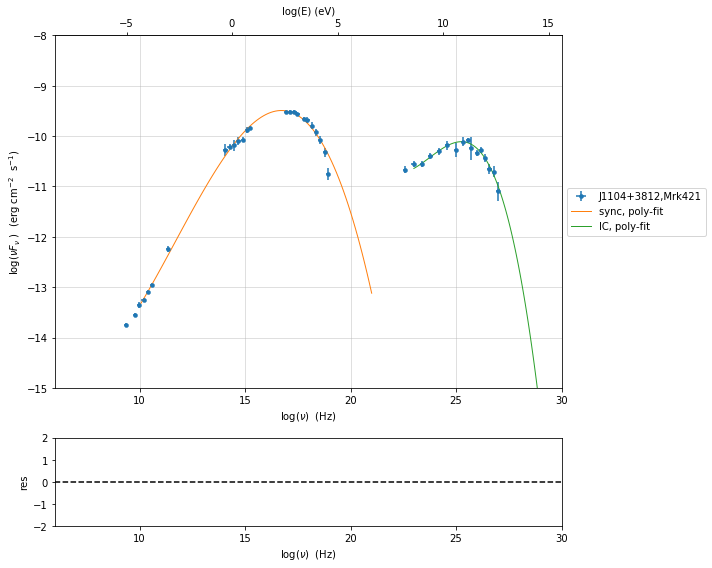

In [37]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining

In [38]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet.pkl')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.080000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.884609e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

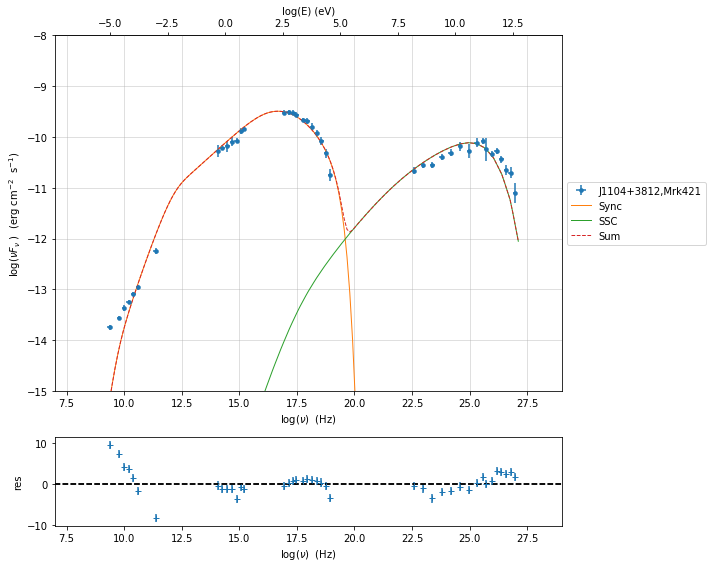

In [39]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting

### Model fitting with LSB

In [6]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

jet_lsb=Jet.load_model('prefit_jet.pkl')
jet_lsb.set_gamma_grid_size(200)

fit_model_lsb=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb',template=None) 
fit_model_lsb.freeze('z_cosm')
fit_model_lsb.freeze('R_H')
fit_model_lsb.freeze('R')
fit_model_lsb.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb.parameters.beam_obj.fit_range=[5,50]

model_minimizer_lsb,best_fit_lsb=fit_SED(fit_model_lsb,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-lsb',minimizer='lsb')


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
               N    electron_density         1 / cm3 3.072164e+00     0.000000e+00               -- False  False
            gmin  low-energy-cut-off lorentz-factor* 3.338231e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 9.758134e+05     1.000000e+00     1.000000e+15 False  False
               s   LE_spectral_slope                 2.181578e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 7.726503e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 2.265855e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 1.649188e+16     1.000000e+03     1.000000e

NameError: name 'fit_SED' is not defined

In [41]:
best_fit_lsb.save_report('SSC-best-fit-lsb.txt')
model_minimizer_lsb.save_model('model_minimizer_lsb.pkl')
fit_model_lsb.save_model('fit_model_lsb.pkl')

best_fit_lsb.bestfit_table

name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str16,object,object,object,float64,float64,object,bool
N,2.659764e+00,4.926714e-01,--,3.072164e+00,0.000000e+00,--,False
gmin,3.340621e+02,6.114562e-01,--,3.338231e+02,1.000000e+00,1.000000e+09,False
gmax,8.827031e+05,4.259265e+05,--,9.758134e+05,1.000000e+00,1.000000e+15,False
s,2.135826e+00,9.549258e-02,--,2.181578e+00,-1.000000e+01,1.000000e+01,False
r,7.599517e-01,1.626997e-01,--,7.726503e-01,-1.500000e+01,1.500000e+01,False
gamma0_log_parab,3.051003e+04,1.015594e+04,--,2.265855e+04,1.000000e+00,1.000000e+09,False
R,--,--,--,1.649188e+16,3.162278e+15,3.162278e+17,True
R_H,--,--,--,1.000000e+17,0.000000e+00,--,True
B,7.457967e-02,1.943815e-02,--,1.000000e-01,0.000000e+00,--,False


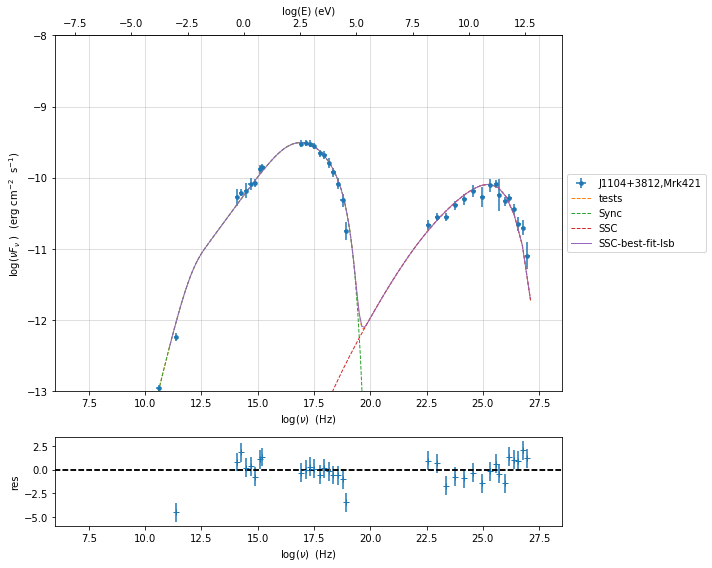

In [42]:
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

### Model fitting with Minuit

In [7]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet
from jetset.minimizer import fit_SED

jet_minuit=Jet.load_model('prefit_jet.pkl')
jet_minuit.set_gamma_grid_size(200)

fit_model_minuit=FitModel( jet=jet_minuit, name='SSC-best-fit-minuit',template=None) 
fit_model_minuit.freeze('z_cosm')
fit_model_minuit.freeze('R_H')
fit_model_minuit.freeze('R')
fit_model_minuit.freeze('gmax')
fit_model_minuit.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.parameters.beam_obj.fit_range=[5,50]

model_minimizer_minuit,best_fit_minuit=fit_SED(fit_model_minuit,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit',minimizer='minuit',max_ev=None)
best_fit_minuit.save_report('SSC-best-fit-minuit.txt')
model_minimizer_minuit.save_model('model_minimizer_minuit.pkl')
fit_model_minuit.save_model('fit_model_minuit.pkl')

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
               N    electron_density         1 / cm3 3.072164e+00     0.000000e+00               -- False  False
            gmin  low-energy-cut-off lorentz-factor* 3.338231e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 9.758134e+05     1.000000e+00     1.000000e+15 False  False
               s   LE_spectral_slope                 2.181578e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 7.726503e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 2.265855e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 1.649188e+16     1.000000e+03     1.000000e

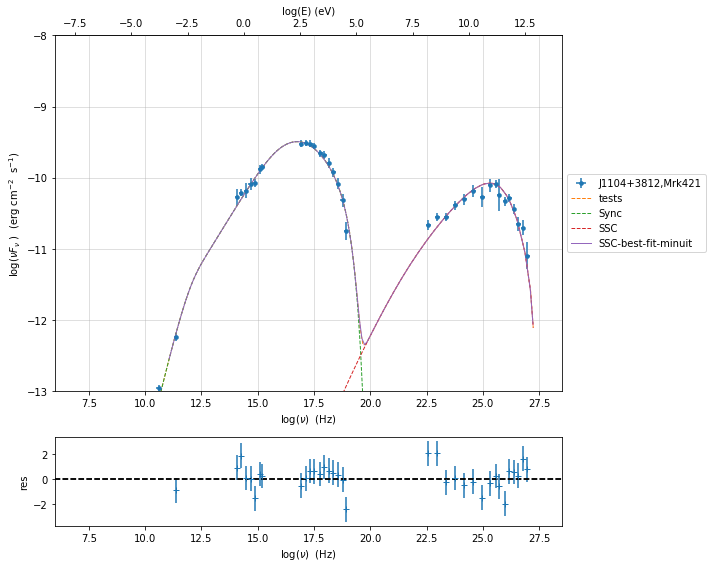

In [8]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

In [9]:
model_minimizer_minuit.minimizer.mesg

------------------------------------------------------------------
| FCN = 36.97                   |     Ncalls=881 (887 total)     |
| EDM = 0.0491 (Goal: 1E-05)    |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 |   1.51    |   0.08    |            |            |    0    |         |       |
| 1 | par_1 |  333.398  |   0.027   |            |            |    1    |  1e+09  |       |
| 2 | par_2 |   1.968   |   0.023   |            |            |   -10   |   10    |       |
| 3 | par_3 |   0.78    |   0.04    |            |            |   -15   |   15    |       |
| 4 | par_4 |  2.13E4   |  0.24E4   |            |            |    1    |  1e+09  |       |
| 5 | par_5 |   0.057   |   0.004   |            |            |    0    |         |       |
| 6 | par_6 |   31.4    |    1.2    |            |            |    5    |   50    |       |
-------------------------------------------------------------------------------------------

NameError: name 'fit_model_lsb' is not defined

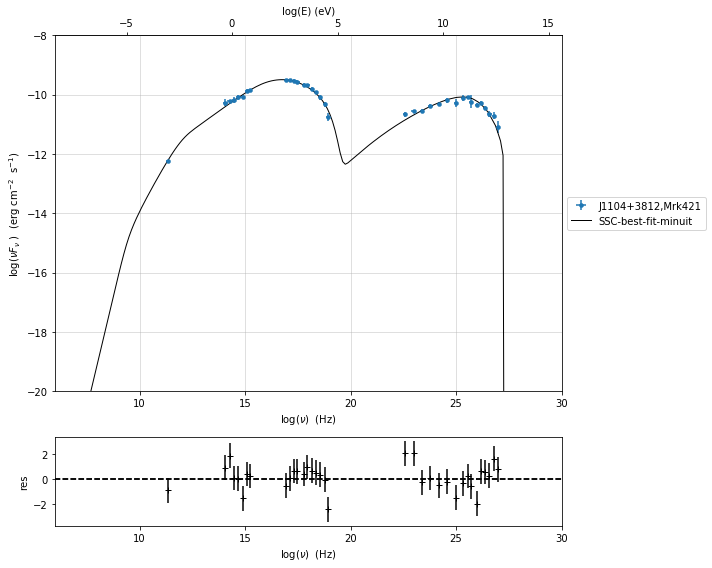

In [11]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11,29],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

## MCMC sampling

In [2]:
from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer


In [24]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_minuit.pkl')


mcmc=McmcSampler(model_minimizer_minuit)
mcmc.run_sampler(nwalkers=128,burnin=10,steps=100,bound=1.5,threads=None,walker_start_bound=0.001)


mcmc run starting


100%|██████████| 100/100 [03:33<00:00,  2.13s/it]

mcmc run done, with 1 threads took 214.14 seconds


In [25]:
print(mcmc.acceptance_fraction)

0.13914062500000002


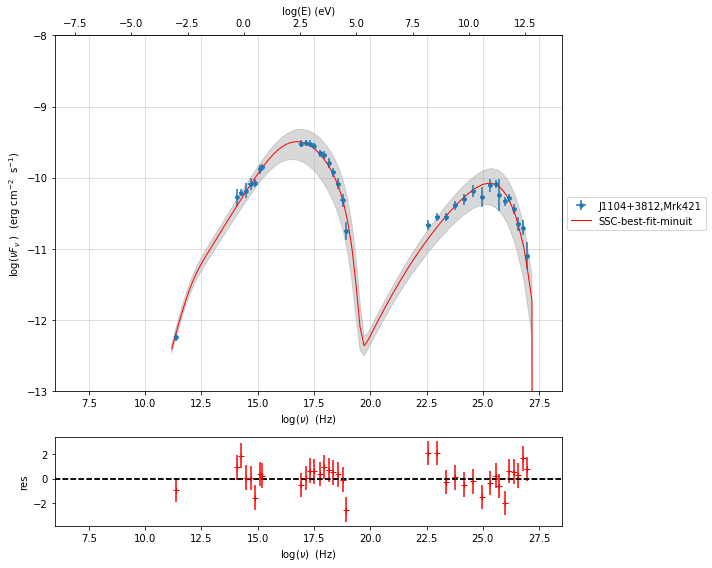

In [26]:
p=mcmc.plot_model(sed_data=sed_data,fit_range=[ 11,27.4],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

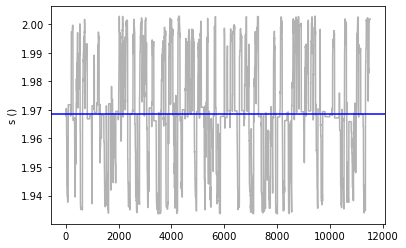

In [27]:
f=mcmc.plot_chain('s',log_plot=False)

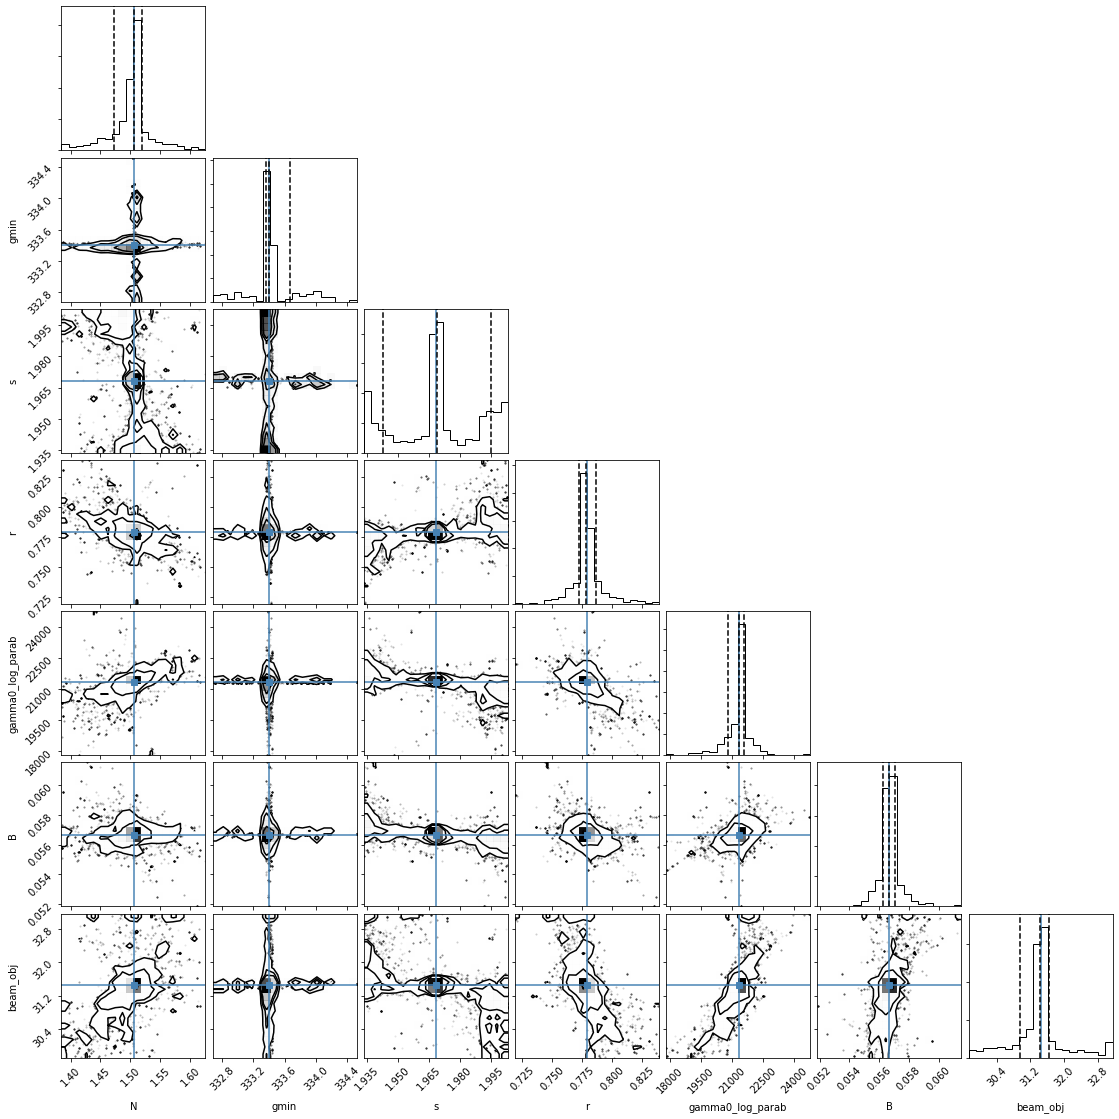

In [28]:
f=mcmc.corner_plot()

In [8]:
mcmc.get_par('N')

(array([1.50176472, 1.50176472, 1.49731032, ..., 1.49911347, 1.49911347,
        1.49911347]),
 0)

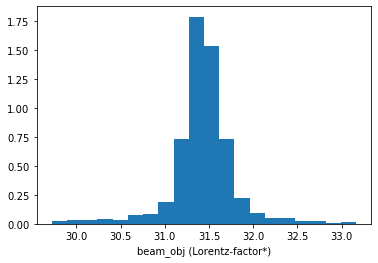

In [9]:
f=mcmc.plot_par('beam_obj')

In [10]:
mcmc.save('mcmc_sampler.pkl')

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
#p=sed_data.plot_sed()

from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer



ms=McmcSampler.load('mcmc_sampler.pkl')

/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv

***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



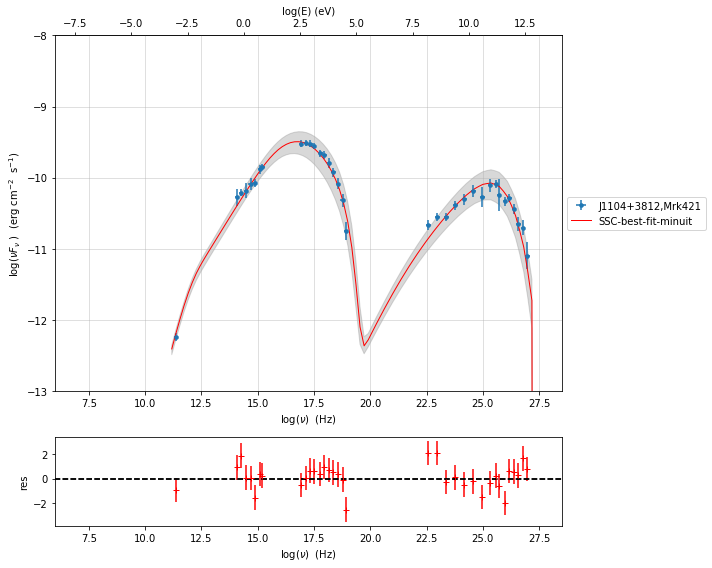

In [3]:
p=ms.plot_model(sed_data=sed_data,fit_range=[ 11,27.4],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

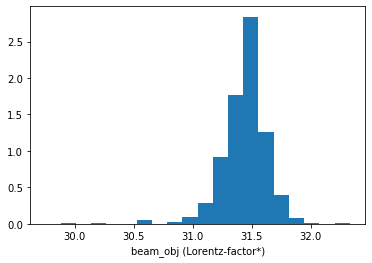

In [30]:
f=ms.plot_par('beam_obj',log_plot=False)


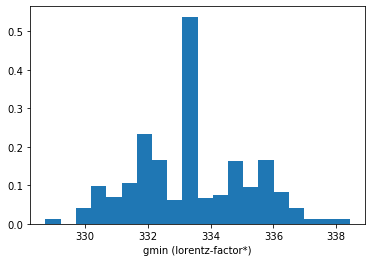

In [32]:
f=ms.plot_par('gmin',log_plot=False)


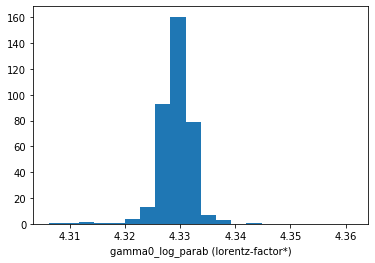

In [33]:
f=ms.plot_par('gamma0_log_parab',log_plot=True)


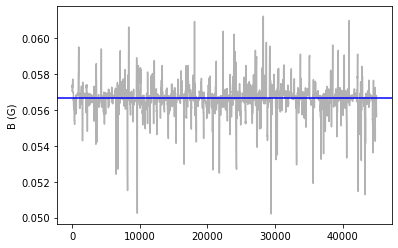

In [4]:
f=ms.plot_chain('B',log_plot=False)